In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [62]:
cars = pd.read_csv('vehicle.csv', sep=';')

In [63]:
cars_models_by_man = cars.groupby(['Year', 'Manufacturer']).agg({'Manufacturer' : ['count']})
cars_models_by_man

Manufacturer
                                        count
Year Manufacturer                            
1984 AM General                             4
     Alfa Romeo                             4
     American Motors Corporation           20
     Aston Martin                           6
     Audi                                  26
...                                       ...
2023 Kia                                   11
     Land Rover                            11
     MINI                                  24
     Mazda                                  2
     Mitsubishi                             4

[1883 rows x 1 columns]

In [64]:
cars.nunique()

Year              40
Manufacturer     141
Model           4624
barrels08        279
barrelsA08         8
                ... 
modifiedOn       247
startStop          2
phevCity          55
phevHwy           52
phevComb          53
Length: 83, dtype: int64

In [65]:
cars_small = cars[['Year', 'Manufacturer', 'Model', 'VClass', 'cylinders', 'displ', 'drive', 'fuelType', 'city08']] 
cars_small['fuelClass'] = np.where(cars_small['fuelType'].isin(['Premium', 'Regular', 'Gasoline or E85', 'CNG', 'Midgrade','Premium or E85', 'Gasoline or natural gas', 'Gasoline or propane']), 'gas',
                                   np.where(cars_small['fuelType'].isin(['Diesel']), 'diesel',
                                            np.where(cars_small['fuelType'].isin(['Electricity']), 'electric',
                                                     np.where(cars_small['fuelType'].isin(['Premium Gas or Electricity','Regular Gas and Electricity', 'Premium and Electricity','Regular Gas or Electricity']), 'hybrid', 'unknown'))))
cars_small

,Year,Manufacturer,Model,VClass,cylinders,displ,drive,fuelType,city08,fuelClass
0,2006,Volvo,V70 AWD,Midsize Station Wagons,5.0,2.5,4-Wheel or All-Wheel Drive,Premium,18,gas
1,2006,Volvo,V70 FWD,Midsize Station Wagons,5.0,2.4,Front-Wheel Drive,Premium,18,gas
2,2006,Chevrolet,Silverado 1500 2WD,Standard Pickup Trucks 2WD,6.0,4.3,Rear-Wheel Drive,Regular,14,gas
3,2006,Chevrolet,Silverado 1500 2WD,Standard Pickup Trucks 2WD,8.0,4.8,Rear-Wheel Drive,Regular,14,gas
4,2006,Chevrolet,Silverado 1500 2WD,Standard Pickup Trucks 2WD,8.0,6.0,Rear-Wheel Drive,Premium,13,gas
...,...,...,...,...,...,...,...,...,...,...
44847,2022,Porsche,718 Boxster GTS,Two Seaters,6.0,4.0,Rear-Wheel Drive,Premium,19,gas
44848,2022,Porsche,718 Spyder,Two Seaters,6.0,4.0,Rear-Wheel Drive,Premium,17,gas
44849,2022,Infiniti,Q60 Red Sport,Subcompact Cars,6.0,3.0,Rear-Wheel Drive,Premium,20,gas
44850,2022,Honda,Civic 5Dr,Large Cars,4.0,1.5,Front-Wheel Drive,Regular,31,gas


In [66]:
major_domestic = ['Chevrolet', 'Ford', 'GMC', 'Oldsmobile', 'Dodge', 'Buick', 'Pontiac',
       'Saturn', 'Cadillac', 'Chrysler', 'Jeep', 'Lincoln', 'Hummer', 'Mercury',
       'Plymouth', 'AM General', 'American Motors Corporation', 'Ram', 'Tesla', 'Eagle',
       'Roush Performance', 'smart', 'Shelby', 'Saleen Performance', 'SRT', 'Saleen', 'General Motors']
major_import = ['Volvo', 'Mazda',
       'Mitsubishi', 'Nissan', 'Toyota', 'Lexus', 'BMW', 'Honda', 'Hyundai', 'Isuzu','Kia',
       'Land Rover', 'Porsche', 'Saab', 'Subaru', 'Volkswagen', 'Bugatti',
       'Infiniti', 'Lamborghini', 'Mercedes-Benz', 'Audi',
       'Peugeot', 'Suzuki', 'Daewoo', 'Jaguar', 'Maybach',
       'Scion', 'Acura', 'Merkur', 'Lotus', 'Aston Martin', 'MINI',
       'Rolls-Royce', 'Renault', 'Fiat', 'Ferrari', 'McLaren Automotive', 'Alfa Romeo', 'Maserati',
       'Daihatsu', 'Bentley', 'Sterling', 'Yugo', 'Pagani', 'Dacia',
       'Koenigsegg', 'STI', 'Panos', 'BMW Alpina']


In [67]:
cars_small['manClass'] = np.where(cars_small['Manufacturer'].isin(major_domestic), 'major domestic',
                                  np.where(cars_small['Manufacturer'].isin(major_import), 'major import', 'other'))
cars_small = cars_small[cars_small['manClass'] != 'other']

In [68]:
cars_small_agg = cars_small.groupby(['Year', 'manClass']).agg({'city08': ['mean'],
                                                               'manClass': ['count'],
                                                               'cylinders': ['count'],
                                                               'cylinders': ['mean'],
                                                               'displ': ['mean']})
cars_small_agg.dropna(inplace=True)
cars_small_agg.columns = cars_small_agg.columns.map('_'.join)
cars_small_agg.to_json('agg_json.json')

In [72]:
cars_small_cylinders = cars_small.groupby(['manClass', 'cylinders']).agg({'displ': ['mean'],
                                                                          'city08': ['mean']})
cars_small_cylinders.dropna(inplace=True)
cars_small_cylinders.columns = cars_small_cylinders.columns.map('_'.join)

#cars_small_cylinders[cars_small_cylinders['manClass']=='major domestic']
cars_small_cylinders

displ_mean  city08_mean
manClass       cylinders                         
major domestic 3.0          1.061157    32.239669
               4.0          2.150124    21.198377
               5.0          3.633333    15.738095
               6.0          3.644708    15.996843
               8.0          5.416481    13.338733
               10.0         7.941860    10.837209
major import   2.0          1.141270    18.952381
               3.0          1.320000    30.025000
               4.0          2.012319    22.679089
               5.0          2.420462    18.163077
               6.0          3.213617    17.310049
               8.0          4.766396    13.976601
               10.0         5.137500    12.291667
               12.0         5.988218    11.114875
               16.0         8.000000     8.352941

In [ ]:
print(cars_small_agg[cars_small_agg['manClass']=='major import']['manClass_count'].to_numpy())

[583 425 354 443 404 437 429 469 440 455 425 435 363 388 425 476 466 529
 554 619 675 706 661 654 710 723 711 745 780 805 840 877 846 869 929 909
 860 838 834  79]


In [ ]:
cars_small_agg.reset_index(inplace=True)
cars_small_agg.to_json('agg_json.json2')

<AxesSubplot:xlabel='displ_mean', ylabel='manClass_count'>

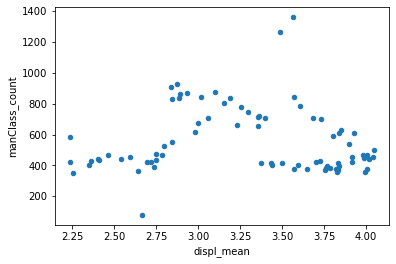

In [ ]:
cars_small_agg.plot(x='displ_mean', y='manClass_count', kind='scatter')

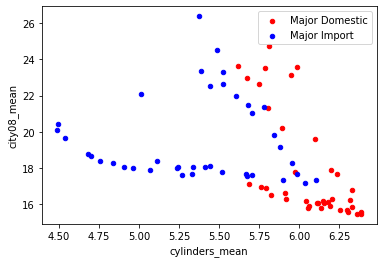

In [ ]:
df1 = cars_small_agg[cars_small_agg['manClass'] == 'major domestic']
df2 = cars_small_agg[cars_small_agg['manClass'] == 'major import']

ax = df1.plot(x='cylinders_mean', y='city08_mean', kind='scatter', c='r', label='Major Domestic')
df2.plot(x='cylinders_mean', y='city08_mean', kind='scatter', ax=ax, c='b', label='Major Import')
plt.show()

In [ ]:
df1['city08_mean'].to_numpy()

array([16.94926471, 17.11769352, 16.882283  , 16.52918782, 16.61408451,
       16.27389444, 15.81020734, 15.81311475, 15.92985318, 16.16161616,
       16.10594796, 15.5748503 , 16.05583756, 15.92458101, 16.06735751,
       16.296     , 16.18766756, 16.14136126, 15.68735084, 15.4893617 ,
       15.47203579, 15.71991247, 15.58636364, 15.85683761, 16.26326964,
       16.80306346, 17.77411168, 17.69230769, 17.91666667, 19.61290323,
       20.21957672, 21.33333333, 23.62318841, 22.94951923, 22.61330049,
       23.52038369, 24.728     , 23.15165877, 23.57142857])

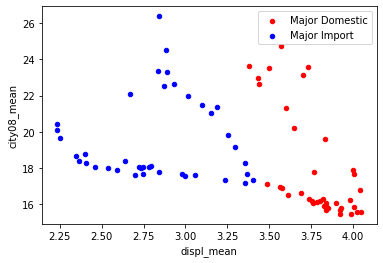

In [ ]:
df1 = cars_small_agg[cars_small_agg['manClass'] == 'major domestic']
df2 = cars_small_agg[cars_small_agg['manClass'] == 'major import']


ax = df1.plot(x='displ_mean', y='city08_mean', kind='scatter', c='r', label='Major Domestic')
df2.plot(x='displ_mean', y='city08_mean', kind='scatter', ax=ax, c='b', label='Major Import')
plt.show()

In [ ]:
cars_small_agg[(cars_small_agg['manClass']=='other')]['city08_mean'].values

array([], dtype=float64)

In [ ]:

cars_small_agg.reset_index(inplace=True)
cars_small_agg.to_json('agg_json.json2')

In [ ]:
cars_small_agg_year = cars_small.groupby(['Year']).agg({'city08': ['mean']})
cars_small_agg_year.reset_index(inplace=True)
cars_small_agg_year.head(40)

,Year,city08
,,mean
0,1984,17.997427
1,1985,17.869899
2,1986,17.697908
3,1987,17.336312
4,1988,17.350090
5,1989,17.052724
6,1990,16.860795
7,1991,16.779425
8,1992,16.790123


In [ ]:
arr = [2.23584906, 2.23404255, 2.25310734, 2.39977427, 2.34579208,
  2.40640732, 2.36293706, 2.46012793, 2.53840909, 2.59362637,
  2.69623529, 2.74735632, 2.64049587, 2.73324742, 2.72004717,
  2.74547368, 2.78232759, 2.79639469, 2.84141049, 2.97977346,
  2.9997037 , 3.05963173, 3.23282905, 3.35458716, 3.40014104,
  3.36445367, 3.35682138, 3.29717362, 3.25469755, 3.15394243,
  3.19087635, 3.09804822, 3.0170441 , 2.93352736, 2.87209555,
  2.83530726, 2.89029586, 2.88567901, 2.84269377, 2.66708861,
  3.56242647, 3.48672986, 3.57312723, 3.60913706, 3.6871831 ,
  3.73466476, 3.85279107, 3.92901639, 3.83768352, 3.80454545,
  3.90018587, 4.049501  , 3.84035533, 3.82541899, 3.76171875,
  3.82249322, 3.7541779 , 3.78522427, 3.83660287, 3.91985816,
  3.98836689, 3.91925602, 4.02022727, 4.00641026, 3.98089172,
  4.03960613, 3.76751269, 4.0064    , 3.99692737, 3.83415301,
  3.6458221 , 3.59717949, 3.37729592, 3.43476071, 3.44040921,
  3.4969697 , 3.57110482, 3.70224439, 3.72920792]

arr.sort()
np.array(arr)

array([2.23404255, 2.23584906, 2.25310734, 2.34579208, 2.36293706,
       2.39977427, 2.40640732, 2.46012793, 2.53840909, 2.59362637,
       2.64049587, 2.66708861, 2.69623529, 2.72004717, 2.73324742,
       2.74547368, 2.74735632, 2.78232759, 2.79639469, 2.83530726,
       2.84141049, 2.84269377, 2.87209555, 2.88567901, 2.89029586,
       2.93352736, 2.97977346, 2.9997037 , 3.0170441 , 3.05963173,
       3.09804822, 3.15394243, 3.19087635, 3.23282905, 3.25469755,
       3.29717362, 3.35458716, 3.35682138, 3.36445367, 3.37729592,
       3.40014104, 3.43476071, 3.44040921, 3.48672986, 3.4969697 ,
       3.56242647, 3.57110482, 3.57312723, 3.59717949, 3.60913706,
       3.6458221 , 3.6871831 , 3.70224439, 3.72920792, 3.73466476,
       3.7541779 , 3.76171875, 3.76751269, 3.78522427, 3.80454545,
       3.82249322, 3.82541899, 3.83415301, 3.83660287, 3.83768352,
       3.84035533, 3.85279107, 3.90018587, 3.91925602, 3.91985816,
       3.92901639, 3.98089172, 3.98836689, 3.99692737, 4.0064 

In [100]:
cars_small_year = cars_small[cars_small['Year']==2022]
cars_small_by_man= cars_small_year.groupby(['manClass', 'Manufacturer']).agg({'Manufacturer': ['count']})
cars_small_by_man.dropna(inplace=True)
cars_small_by_man.columns = cars_small_by_man.columns.map('_'.join)
cars_small_by_man['Manufacturer_count'].sort_values(ascending=False).head(20).values




array([106,  96,  93,  90,  71,  66,  60,  56,  47,  41,  41,  37,  36,
        34,  32,  31,  28,  26,  25,  23])